In [ ]:
from google.colab import files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
FROM_DRIVE = True
if FROM_DRIVE:
  from google.colab import drive

  # Mount Google Drive
  drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

def upload_dataset(from_drive = False):
  if not os.path.exists("kaggle.json"):
    if not from_drive:
      print("Upload Kaggle API Key")
      files.upload()
      print("Downloading dataset...")
    else:
      !cp /content/drive/MyDrive/kaggle.json /content/
    !mkdir -p ~/.kaggle
    !cp kaggle.json ~/.kaggle/
    !chmod 600 ~/.kaggle/kaggle.json
    !kaggle datasets download -d omermetinn/tweets-about-the-top-companies-from-2015-to-2020
    !unzip tweets-about-the-top-companies-from-2015-to-2020.zip
  else:
    print("Dataset already exists")

In [ ]:
upload_dataset(from_drive = True)

 98% 273M/278M [00:02<00:00, 92.8MB/s]
100% 278M/278M [00:02<00:00, 104MB/s] 
Archive:  tweets-about-the-top-companies-from-2015-to-2020.zip
  inflating: Company.csv             
  inflating: Company_Tweet.csv       
  inflating: Tweet.csv               


In [ ]:
# loading datasets
tweet = pd.read_csv("Tweet.csv")
company_tweet = pd.read_csv("Company_Tweet.csv")

In [ ]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3717964 entries, 0 to 3717963
Data columns (total 7 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   tweet_id     int64 
 1   writer       object
 2   post_date    int64 
 3   body         object
 4   comment_num  int64 
 5   retweet_num  int64 
 6   like_num     int64 
dtypes: int64(5), object(2)
memory usage: 198.6+ MB


In [ ]:
company_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4336445 entries, 0 to 4336444
Data columns (total 2 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   tweet_id       int64 
 1   ticker_symbol  object
dtypes: int64(1), object(1)
memory usage: 66.2+ MB


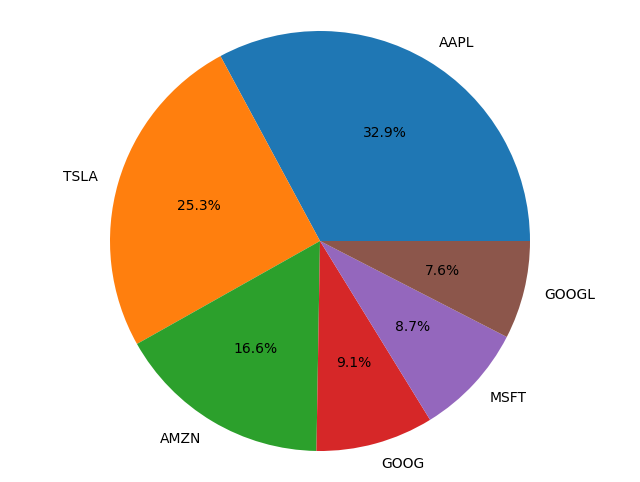

In [ ]:
ticker_counts = company_tweet["ticker_symbol"].value_counts()
plt.figure(figsize=(8,6))
plt.pie(ticker_counts, labels=ticker_counts.index, autopct="%1.1f%%",startangle=0)
plt.axis("equal")
plt.show()

In [ ]:
# adding company ticker column to the tweet df, new df name is tweets
tweets = tweet.merge(company_tweet, how="left", on="tweet_id")

In [ ]:
tweets.head()

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL
2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN
3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA
4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL


In [ ]:
#before filtering APPLE data
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4336445 entries, 0 to 4336444
Data columns (total 8 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   tweet_id       int64 
 1   writer         object
 2   post_date      int64 
 3   body           object
 4   comment_num    int64 
 5   retweet_num    int64 
 6   like_num       int64 
 7   ticker_symbol  object
dtypes: int64(5), object(3)
memory usage: 297.8+ MB


In [ ]:
tweets["tweet_id"].unique().shape

(3717964,)

In [ ]:
# Filtering Apple data
tweets = tweets[tweets["ticker_symbol"] == "AAPL"]
tweets

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL
4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL
6,550443808606126081,aaplstocknews,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL
8,550443809700851716,iknowfirst,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL
...,...,...,...,...,...,...,...,...
4336437,1212159254884433921,QuantWolfLine,1577836261,Imagine calling your broker-dealer and wanting...,1,0,1,AAPL
4336438,1212159275637886976,GMGRIFF_79,1577836266,"$AAPL yearly~ Heck of a year.. Jan. 2, 1999~ar...",0,0,1,AAPL
4336439,1212159765914079234,TEEELAZER,1577836383,That $SPY $SPX puuump in the last hour was the...,1,0,6,AAPL
4336442,1212160410692046849,MoriaCrypto,1577836537,I don't discriminate. I own both $aapl and $ms...,1,0,1,AAPL


In [ ]:
# checking if there is a NaN post_date element
tweet["post_date"].isnull().sum()

0

In [ ]:
# converting seconds to the days
tweets["date"] = pd.to_datetime(tweets["post_date"], unit="s").dt.date

In [ ]:
# Checking if the dates are between 01-01-2015 and 31-12-2019
print(tweets["date"].min())
print(tweets["date"].max())

2015-01-01
2019-12-31


In [ ]:
tweets

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,date
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL,2015-01-01
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL,2015-01-01
4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,2015-01-01
6,550443808606126081,aaplstocknews,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,2015-01-01
8,550443809700851716,iknowfirst,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,2015-01-01
...,...,...,...,...,...,...,...,...,...
4336437,1212159254884433921,QuantWolfLine,1577836261,Imagine calling your broker-dealer and wanting...,1,0,1,AAPL,2019-12-31
4336438,1212159275637886976,GMGRIFF_79,1577836266,"$AAPL yearly~ Heck of a year.. Jan. 2, 1999~ar...",0,0,1,AAPL,2019-12-31
4336439,1212159765914079234,TEEELAZER,1577836383,That $SPY $SPX puuump in the last hour was the...,1,0,6,AAPL,2019-12-31
4336442,1212160410692046849,MoriaCrypto,1577836537,I don't discriminate. I own both $aapl and $ms...,1,0,1,AAPL,2019-12-31


In [ ]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1425013 entries, 0 to 4336444
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   tweet_id       1425013 non-null  int64 
 1   writer         1414802 non-null  object
 2   post_date      1425013 non-null  int64 
 3   body           1425013 non-null  object
 4   comment_num    1425013 non-null  int64 
 5   retweet_num    1425013 non-null  int64 
 6   like_num       1425013 non-null  int64 
 7   ticker_symbol  1425013 non-null  object
 8   date           1425013 non-null  object
dtypes: int64(5), object(4)
memory usage: 108.7+ MB


In [ ]:
try:
  from textblob import TextBlob
except ImportError:
  !pip3 install textBlob
  from textblob import TextBlob


In [ ]:
def analyze_sentiment(text):
    return  TextBlob(text).polarity


In [ ]:
# using bert
from transformers import BertTokenizer, BertForSequenceClassification
from torch.nn.functional import softmax
import torch

# Load pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)

# Set the model to evaluation mode
model.eval()

def get_bert_sentiment(text):
    # Tokenize the input text
    tokens = tokenizer.encode(text, return_tensors='pt')

    # Make a prediction
    with torch.no_grad():
        outputs = model(tokens)

    # Access logits from the model outputs
    logits = outputs[0]

    # Apply softmax to get probabilities
    probabilities = softmax(logits, dim=1).squeeze()

    # Get the predicted class (0 for negative, 1 for neutral, 2 for positive)
    predicted_class = torch.argmax(probabilities).item()

    return predicted_class, probabilities[predicted_class].item()

# sentiment_class, confidence = get_bert_sentiment(text_to_analyze)


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
if FROM_DRIVE:
  tweets["sentiment"] = np.load("/content/drive/MyDrive/sentiment.npy")
else:
  if not os.path.exists("sentiment.npy"):
    tweets["sentiment"] = tweets['body'].apply(analyze_sentiment)
    np.save("sentiment.npy", tweets["sentiment"].values)
  else:
    tweets["sentiment"] = np.load("sentiment.npy")

In [ ]:
# using bert
if not os.path.exists("sentiment.npy"):
      tweets["sentiment"] = tweets['body'].apply(get_bert_sentiment)
      np.save("sentiment.npy", tweets["sentiment"].values)
else:
      tweets["sentiment"] = np.load("sentiment.npy")

In [ ]:
np.save("sentiment.npy", tweets["sentiment"].values)

In [ ]:
tweets

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,date,sentiment
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL,2015-01-01,0
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL,2015-01-01,0
4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,2015-01-01,0
6,550443808606126081,aaplstocknews,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,2015-01-01,0
8,550443809700851716,iknowfirst,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,2015-01-01,0
...,...,...,...,...,...,...,...,...,...,...
4336437,1212159254884433921,QuantWolfLine,1577836261,Imagine calling your broker-dealer and wanting...,1,0,1,AAPL,2019-12-31,1
4336438,1212159275637886976,GMGRIFF_79,1577836266,"$AAPL yearly~ Heck of a year.. Jan. 2, 1999~ar...",0,0,1,AAPL,2019-12-31,1
4336439,1212159765914079234,TEEELAZER,1577836383,That $SPY $SPX puuump in the last hour was the...,1,0,6,AAPL,2019-12-31,-1
4336442,1212160410692046849,MoriaCrypto,1577836537,I don't discriminate. I own both $aapl and $ms...,1,0,1,AAPL,2019-12-31,1


In [ ]:
# summing # of likes, retweets, and comments
tweets["interaction"] = tweets["like_num"] + tweets["comment_num"] + tweets["retweet_num"]

In [ ]:
# adding or substracting the log+1 of interactions according to sentiment
tweets["score"] = tweets["sentiment"] * np.log((tweets["interaction"] + 1))

In [ ]:
tweets

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,date,sentiment,interaction,score
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL,2015-01-01,0,1,0.000000
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL,2015-01-01,0,0,0.000000
4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,2015-01-01,0,1,0.000000
6,550443808606126081,aaplstocknews,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,2015-01-01,0,1,0.000000
8,550443809700851716,iknowfirst,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,2015-01-01,0,1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
4336437,1212159254884433921,QuantWolfLine,1577836261,Imagine calling your broker-dealer and wanting...,1,0,1,AAPL,2019-12-31,1,2,1.098612
4336438,1212159275637886976,GMGRIFF_79,1577836266,"$AAPL yearly~ Heck of a year.. Jan. 2, 1999~ar...",0,0,1,AAPL,2019-12-31,1,1,0.693147
4336439,1212159765914079234,TEEELAZER,1577836383,That $SPY $SPX puuump in the last hour was the...,1,0,6,AAPL,2019-12-31,-1,7,-2.079442
4336442,1212160410692046849,MoriaCrypto,1577836537,I don't discriminate. I own both $aapl and $ms...,1,0,1,AAPL,2019-12-31,1,2,1.098612


In [ ]:
sentiments = pd.DataFrame(tweets.groupby("date")["score"].mean())

In [ ]:
sentiments

,score
date,
2015-01-01,0.134006
2015-01-02,0.095938
2015-01-03,0.108909
2015-01-04,0.084324
2015-01-05,0.111145
...,...
2019-12-27,0.207923
2019-12-28,0.211462
2019-12-29,0.421950


In [ ]:
sentiments.describe()

,score
count,1819.000000
mean,0.156200
std,0.083438
min,-0.032519
25%,0.090616
50%,0.144685
75%,0.205686
max,0.599171


In [ ]:

mean = sentiments.mean()
std = sentiments.std()
sentiments = (sentiments - mean) / std
sentiments

,score
date,
2015-01-01,-0.620063
2015-01-02,-0.564333
2015-01-03,-0.743197
2015-01-04,-1.058635
2015-01-05,-0.742312
...,...
2019-12-27,1.140687
2019-12-28,1.665468
2019-12-29,2.399584


In [ ]:
try:
  import yfinance as yf
except ImportError:
  !pip install yfinance
  import yfinance as yf

In [ ]:
apple_ticker = yf.Ticker("AAPl")

aapl = apple_ticker.history(period="1d", start="2015-01-01", end="2019-12-31")

In [ ]:
aapl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2015-01-02 00:00:00-05:00 to 2019-12-30 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1257 non-null   float64
 1   High          1257 non-null   float64
 2   Low           1257 non-null   float64
 3   Close         1257 non-null   float64
 4   Volume        1257 non-null   int64  
 5   Dividends     1257 non-null   float64
 6   Stock Splits  1257 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 78.6 KB


In [ ]:
aapl.drop(["High", "Low"], axis=1, inplace=True)

In [ ]:
aapl.index

DatetimeIndex(['2015-01-02 00:00:00-05:00', '2015-01-05 00:00:00-05:00',
               '2015-01-06 00:00:00-05:00', '2015-01-07 00:00:00-05:00',
               '2015-01-08 00:00:00-05:00', '2015-01-09 00:00:00-05:00',
               '2015-01-12 00:00:00-05:00', '2015-01-13 00:00:00-05:00',
               '2015-01-14 00:00:00-05:00', '2015-01-15 00:00:00-05:00',
               ...
               '2019-12-16 00:00:00-05:00', '2019-12-17 00:00:00-05:00',
               '2019-12-18 00:00:00-05:00', '2019-12-19 00:00:00-05:00',
               '2019-12-20 00:00:00-05:00', '2019-12-23 00:00:00-05:00',
               '2019-12-24 00:00:00-05:00', '2019-12-26 00:00:00-05:00',
               '2019-12-27 00:00:00-05:00', '2019-12-30 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=1257, freq=None)

In [ ]:
# altering the date type of aapl to be same as sentiments data
aapl["date"] = aapl.index.to_pydatetime()
aapl["date"] = aapl["date"].dt.date
aapl.reset_index(drop=True, inplace=True)

In [ ]:
import datetime

In [ ]:
# adding 1 day to sentiments. This way, we'll use the sentiments of 1 day before in aapl data
sentiments["date"] = sentiments.index + datetime.timedelta(days=1)
sentiments.reset_index(drop=True, inplace=True)

In [ ]:
sentiments

,score,date
0,-0.620063,2015-01-02
1,-0.564333,2015-01-03
2,-0.743197,2015-01-04
3,-1.058635,2015-01-05
4,-0.742312,2015-01-06
...,...,...
1814,1.140687,2019-12-28
1815,1.665468,2019-12-29
1816,2.399584,2019-12-30
1817,2.241341,2019-12-31


In [ ]:
# there are 2 dfs, to be compared one with sentiments and one without sentiments (raw aapl data)
final_df_wo_sentiments = aapl.copy()
final_df = aapl.merge(sentiments, how="left", on="date")

In [ ]:
final_df_wo_sentiments

,Open,Close,Volume,Dividends,Stock Splits,date
0,24.927451,24.466454,212818400,0.0,0.0,2015-01-02
1,24.233710,23.777187,257142000,0.0,0.0,2015-01-05
2,23.842084,23.779425,263188400,0.0,0.0,2015-01-06
3,23.989783,24.112865,160423600,0.0,0.0,2015-01-07
4,24.444077,25.039345,237458000,0.0,0.0,2015-01-08
...,...,...,...,...,...,...
1252,68.325332,69.170479,98572000,0.0,0.0,2019-12-23
1253,69.338527,69.236229,48478800,0.0,0.0,2019-12-24
1254,69.370207,70.609917,93121200,0.0,0.0,2019-12-26
1255,70.904598,70.583099,146266000,0.0,0.0,2019-12-27


In [ ]:
final_df

,Open,Close,Volume,Dividends,Stock Splits,date,score,Close_lag1
1,24.233717,23.777195,257142000,0.0,0.0,2015-01-05,-1.058635,24.466454
2,23.842090,23.779430,263188400,0.0,0.0,2015-01-06,-0.742312,23.777195
3,23.989781,24.112864,160423600,0.0,0.0,2015-01-07,-1.126080,23.779430
4,24.444073,25.039341,237458000,0.0,0.0,2015-01-08,-0.804361,24.112864
5,25.213886,25.066189,214798000,0.0,0.0,2015-01-09,0.265699,25.039341
...,...,...,...,...,...,...,...,...
1252,68.325325,69.170471,98572000,0.0,0.0,2019-12-23,1.197459,68.059837
1253,69.338542,69.236244,48478800,0.0,0.0,2019-12-24,0.840796,69.170471
1254,69.370207,70.609917,93121200,0.0,0.0,2019-12-26,2.604329,69.236244
1255,70.904613,70.583115,146266000,0.0,0.0,2019-12-27,1.737329,70.609917


In [ ]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [ ]:
def train_valid_test_lr(df):
  X = df.copy()
  X.drop("Close", axis=1, inplace=True)
  X.drop("date", axis=1, inplace=True)
  y = final_df["Close"]

  try:
    X["score"] = X["score"].fillna(0)
  except (KeyError):
    pass

  X_train, X_rest, y_train, y_rest = train_test_split(X, y, test_size=0.2, random_state=42)
  X_valid, X_test, y_valid, y_test = train_test_split(X_rest, y_rest, test_size=0.5, random_state=42)

  return X_train, y_train, X_valid, y_valid, X_test, y_test

In [ ]:
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_lr(final_df)
X_train_wos, y_train_wos, X_valid_wos, y_valid_wos, X_test_wos, y_test_wos = train_valid_test_lr(final_df_wo_sentiments)

In [ ]:
y_train

706     36.805744
199     25.164787
1013    36.542385
1157    49.211716
381     22.258297
          ...    
1044    42.140491
1095    47.699780
1130    48.756931
860     45.709774
1126    47.310314
Name: Close, Length: 1005, dtype: float64

In [ ]:
X_valid

,Open,Volume,Dividends,Stock Splits,score
479,25.855740,45903600,0.0,0.0,0.148664
636,34.139443,100797600,0.0,0.0,0.160639
209,27.419737,197461200,0.0,0.0,0.101954
31,28.674449,179566800,0.0,0.0,0.125872
308,24.135041,104532000,0.0,0.0,0.042437
...,...,...,...,...,...
741,39.999477,141095200,0.0,0.0,0.186029
1062,46.150431,175381200,0.0,0.0,0.286281
613,36.413066,259530800,0.0,0.0,0.115766
170,24.695669,199985200,0.0,0.0,0.090023


In [ ]:
def calc_accuracy(pred, y_test):
  #evaluating if the model correctly predicted increase or decrease in the price
  y_comparison = np.array(y_test)[1:] > np.array(y_test)[:-1]
  y_comparison = np.insert(y_comparison, 0, False)  # To match the length, adding False at the beginning

  pred_comparison = np.array(pred)[1:] > np.array(pred)[:-1]
  pred_comparison = np.insert(pred_comparison, 0, False)

  # calculating accuracy
  accuracy = np.sum((pred_comparison == y_comparison)) / len(pred_comparison)
  return accuracy

In [ ]:
def calc_accuracy2(pred, y_test):
  #evaluating if the model correctly predicted increase or decrease in the price
  y_comparison = np.array(y_test)[1:] > np.array(y_test)[:-1]
  y_comparison = np.insert(y_comparison, 0, False)  # To match the length, adding False at the beginning

  pred_comparison = np.array(pred)[1:] > np.array(pred)[:-1]
  pred_comparison = np.insert(pred_comparison, 0, False)

  # calculating accuracy
  accuracy = np.sum((pred_comparison == y_comparison)) / len(pred_comparison)
  return pred_comparison,y_comparison

In [ ]:
# fitting LR with df with sentiments
model = LinearRegression()
model.fit(X_train, y_train)

pred = model.predict(X_test)
mse = mean_squared_error(pred, y_test.values)
acc = calc_accuracy(pred, y_test.values)
print("MSE of Logistic Regression with sentiments: ", mse)
print("Increase/Decrease Accuracy of Logistic Regression without sentiments: ", acc)

MSE of Logistic Regression with sentiments:  0.1259586124322118
Increase/Decrease Accuracy of Logistic Regression without sentiments:  0.9920634920634921


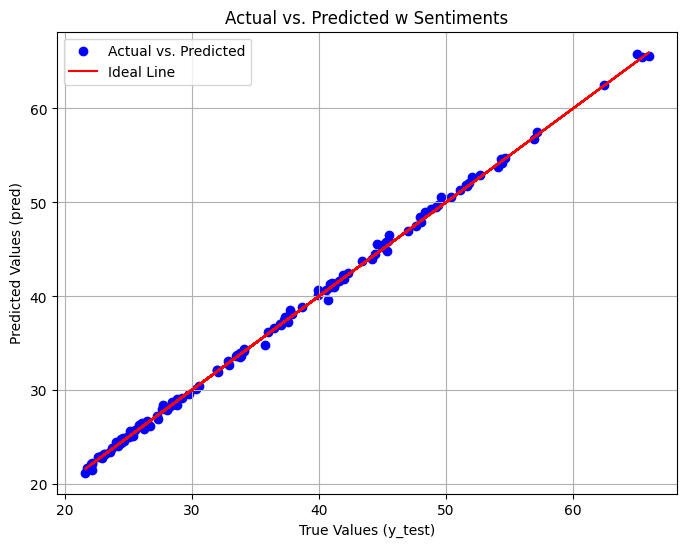

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred, color='blue', label='Actual vs. Predicted')  # Scatter plot
plt.plot(y_test, y_test, color='red', label='Ideal Line')  # Ideal line (y_test = y_pred)

plt.title('Actual vs. Predicted w Sentiments')
plt.xlabel('True Values (y_test)')
plt.ylabel('Predicted Values (pred)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# fitting LR with df with sentiments
model = LinearRegression()
model.fit(X_train_wos, y_train_wos)

pred = model.predict(X_test_wos)
mse = mean_squared_error(pred, y_test_wos)
acc = calc_accuracy(pred, y_test_wos)
print("MSE of Logistic Regression with sentiments: ", mse)
print("Increase/Decrease Accuracy of Logistic Regression without sentiments: ", acc)

MSE of Logistic Regression with sentiments:  0.12619998657089343
Increase/Decrease Accuracy of Logistic Regression without sentiments:  0.9920634920634921


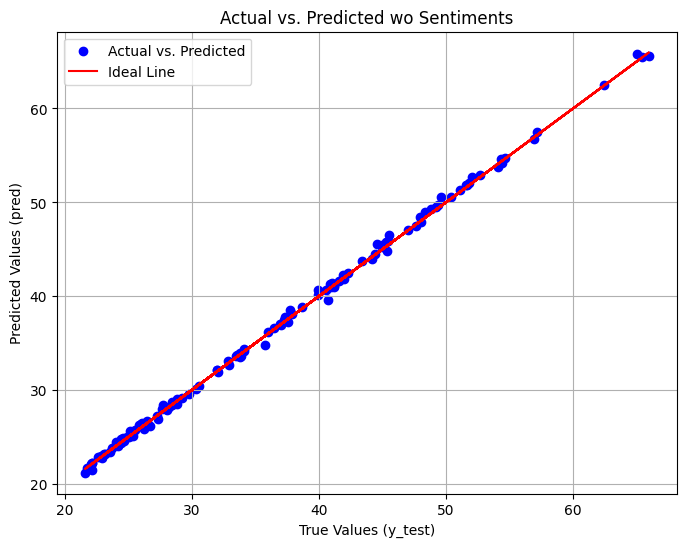

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred, color='blue', label='Actual vs. Predicted')  # Scatter plot
plt.plot(y_test, y_test, color='red', label='Ideal Line')  # Ideal line (y_test = y_pred)

plt.title('Actual vs. Predicted wo Sentiments')
plt.xlabel('True Values (y_test)')
plt.ylabel('Predicted Values (pred)')
plt.legend()
plt.grid(True)
plt.show()

LSTM PART 1

In [ ]:
final_df["score"] = final_df["score"].fillna(0)
train = final_df.iloc[:1000, [0,6,1]].values
test = final_df.iloc[1000:, [0,6,1]].values

In [ ]:
train

array([[24.92745084,  0.13400613, 24.46645355],
       [24.23370955,  0.08432385, 23.77718735],
       [23.84208427,  0.11114525, 23.77942467],
       ...,
       [39.68338147,  0.18728401, 39.84894943],
       [39.83215773,  0.19116147, 38.60599899],
       [38.48840787,  0.1700478 , 37.63177872]])

In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
train_scaled = sc.fit_transform(train)

In [ ]:
train_scaled

array([[0.12207351, 0.268608  , 0.10571989],
       [0.10194369, 0.18846977, 0.08585262],
       [0.09058016, 0.23173306, 0.08591711],
       ...,
       [0.55023641, 0.35454598, 0.54910183],
       [0.55455335, 0.36080038, 0.51327528],
       [0.51556267, 0.32674373, 0.48519455]])

In [ ]:
X_train = []
y_train = []
past = 10


for i in range(past, train_scaled.shape[0]):
    X_train.append(train_scaled[i-past:i, [0,1]])
    y_train.append(train_scaled[i, 2])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 2))

In [ ]:
try:
  import tensorflow as tf
except ImportError:
  !pip install tensorflow
  import tensorflow as tf

In [ ]:
tf.random.set_seed(42)

In [ ]:
if tf.config.list_physical_devices('GPU'):
    print("GPU available")
    print(tf.config.list_physical_devices('GPU'))
else:
    print("No GPU available")

No GPU available


In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(20, return_sequences=True, input_shape=(X_train.shape[1], 2)))


model.add(tf.keras.layers.LSTM(20, return_sequences=True))


model.add(tf.keras.layers.LSTM(20, return_sequences=True))


model.add(tf.keras.layers.LSTM(20, return_sequences=True))


model.add(tf.keras.layers.LSTM(20))

model.add(tf.keras.layers.Dense(1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 20)            1840      
                                                                 
 lstm_1 (LSTM)               (None, 10, 20)            3280      
                                                                 
 lstm_2 (LSTM)               (None, 10, 20)            3280      
                                                                 
 lstm_3 (LSTM)               (None, 10, 20)            3280      
                                                                 
 lstm_4 (LSTM)               (None, 20)                3280      
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 14981 (58.52 KB)
Trainable params: 14981 (

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer=optimizer, loss='mean_squared_error')

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32)

Epoch 1/20
31/31 [==============================] - 10s 22ms/step - loss: 0.0816
Epoch 2/20
31/31 [==============================] - 1s 22ms/step - loss: 0.0081
Epoch 3/20
31/31 [==============================] - 1s 25ms/step - loss: 0.0023
Epoch 4/20
31/31 [==============================] - 1s 33ms/step - loss: 0.0020
Epoch 5/20
31/31 [==============================] - 1s 33ms/step - loss: 0.0020
Epoch 6/20
31/31 [==============================] - 1s 35ms/step - loss: 0.0020
Epoch 7/20
31/31 [==============================] - 1s 33ms/step - loss: 0.0019
Epoch 8/20
31/31 [==============================] - 1s 33ms/step - loss: 0.0020
Epoch 9/20
31/31 [==============================] - 1s 31ms/step - loss: 0.0020
Epoch 10/20
31/31 [==============================] - 1s 21ms/step - loss: 0.0019
Epoch 11/20
31/31 [==============================] - 1s 22ms/step - loss: 0.0020
Epoch 12/20
31/31 [==============================] - 1s 22ms/step - loss: 0.0018
Epoch 13/20
31/31 [=================

In [ ]:
inputs = final_df[["Open","score", "Close"]][final_df.shape[0] - len(test) - past: ].values
inputs = sc.transform(inputs)

In [ ]:
X_test = []
y_test = []
for i in range(past, len(inputs)):
    X_test.append(inputs[i-past:i, [0,1]])
    y_test.append(inputs[i, 2])

In [ ]:
X_test = np.array(X_test)
y_test = np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 2))

In [ ]:
pred = model.predict(X_test)

9/9 [==============================] - 2s 8ms/step


In [ ]:
rescaled_pred = pred * (sc.data_max_[2] - sc.data_min_[2]) + sc.data_min_[2]

In [ ]:
rescaled_y_test = y_test * (sc.data_max_[2] - sc.data_min_[2]) + sc.data_min_[2]

In [ ]:
mse = mean_squared_error(rescaled_pred, rescaled_y_test)
acc = calc_accuracy(rescaled_pred, rescaled_y_test)
print("MSE of LSTM with sentiments: ", mse)
print("Increase/Decrease Accuracy of LSTM with sentiments: ", acc)

MSE of LSTM with sentiments:  11.448161412557441
Increase/Decrease Accuracy of LSTM with sentiments:  0.5486381322957199


In [ ]:
import matplotlib.pyplot as plt

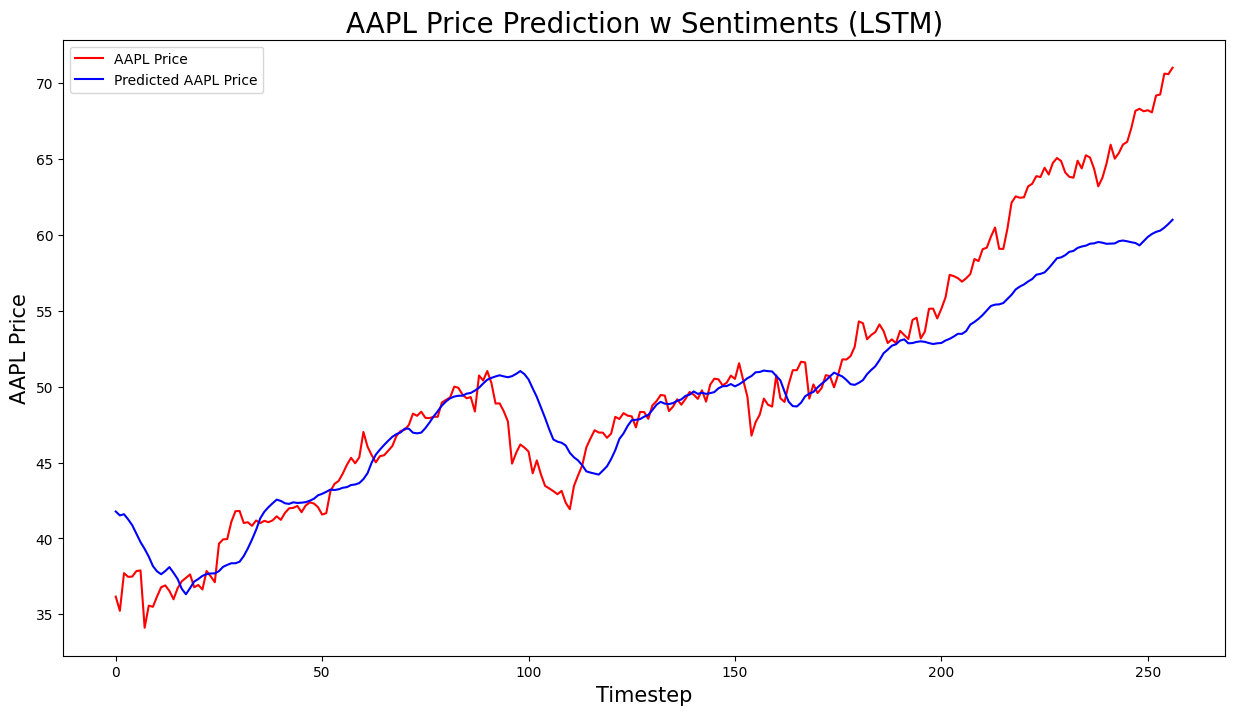

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(rescaled_y_test, color='Red', label='AAPL Price')
plt.plot(rescaled_pred, color='Blue', label='Predicted AAPL Price')
plt.title('AAPL Price Prediction w Sentiments (LSTM)',fontsize=20)
plt.xlabel('Timestep', fontsize=15)
plt.ylabel('AAPL Price',fontsize=15)
plt.legend()
plt.show()

LSTM PART 2

In [ ]:
train = final_df_wo_sentiments.iloc[:1000, [0,1]].values
test = final_df_wo_sentiments.iloc[1000:, [0,1]].values

In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
train_scaled = sc.fit_transform(train)

In [ ]:
X_train = []
y_train = []


for i in range(past, train_scaled.shape[0]):
    X_train.append(train_scaled[i-past:i, 0])
    y_train.append(train_scaled[i, 1])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(20, return_sequences=True, input_shape=(X_train.shape[1], 1)))


model.add(tf.keras.layers.LSTM(20, return_sequences=True))


model.add(tf.keras.layers.LSTM(20, return_sequences=True))


model.add(tf.keras.layers.LSTM(20, return_sequences=True))


model.add(tf.keras.layers.LSTM(20))

model.add(tf.keras.layers.Dense(1))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 10, 20)            1760      
                                                                 
 lstm_6 (LSTM)               (None, 10, 20)            3280      
                                                                 
 lstm_7 (LSTM)               (None, 10, 20)            3280      
                                                                 
 lstm_8 (LSTM)               (None, 10, 20)            3280      
                                                                 
 lstm_9 (LSTM)               (None, 20)                3280      
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 14901 (58.21 KB)
Trainable params: 14901

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer=optimizer, loss='mean_squared_error')

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32)

Epoch 1/20
31/31 [==============================] - 10s 22ms/step - loss: 0.0832
Epoch 2/20
31/31 [==============================] - 1s 23ms/step - loss: 0.0091
Epoch 3/20
31/31 [==============================] - 1s 22ms/step - loss: 0.0022
Epoch 4/20
31/31 [==============================] - 1s 22ms/step - loss: 0.0020
Epoch 5/20
31/31 [==============================] - 1s 31ms/step - loss: 0.0019
Epoch 6/20
31/31 [==============================] - 1s 32ms/step - loss: 0.0019
Epoch 7/20
31/31 [==============================] - 1s 33ms/step - loss: 0.0019
Epoch 8/20
31/31 [==============================] - 1s 32ms/step - loss: 0.0020
Epoch 9/20
31/31 [==============================] - 1s 33ms/step - loss: 0.0020
Epoch 10/20
31/31 [==============================] - 1s 32ms/step - loss: 0.0019
Epoch 11/20
31/31 [==============================] - 1s 33ms/step - loss: 0.0020
Epoch 12/20
31/31 [==============================] - 1s 34ms/step - loss: 0.0018
Epoch 13/20
31/31 [=================

In [ ]:
inputs = final_df[["Open", "Close"]][final_df_wo_sentiments.shape[0] - len(test) - past: ].values
inputs = sc.transform(inputs)

In [ ]:
X_test = []
y_test = []
for i in range(past, len(inputs)):
    X_test.append(inputs[i-past:i, 0])
    y_test.append(inputs[i, 1])

In [ ]:
X_test = np.array(X_test)
y_test = np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
pred = model.predict(X_test)

rescaled_pred = pred * (sc.data_max_[1] - sc.data_min_[1]) + sc.data_min_[1]
rescaled_y_test = y_test * (sc.data_max_[1] - sc.data_min_[1]) + sc.data_min_[1]

9/9 [==============================] - 3s 9ms/step


In [ ]:
mse = mean_squared_error(rescaled_pred, rescaled_y_test)
acc = calc_accuracy(rescaled_pred, rescaled_y_test)
print("MSE of LSTM without sentiments: ", mse)
print("Increase/Decrease Accuracy of LSTM without sentiments: ", acc)

MSE of LSTM without sentiments:  10.854389382141813
Increase/Decrease Accuracy of LSTM without sentiments:  0.5447470817120622


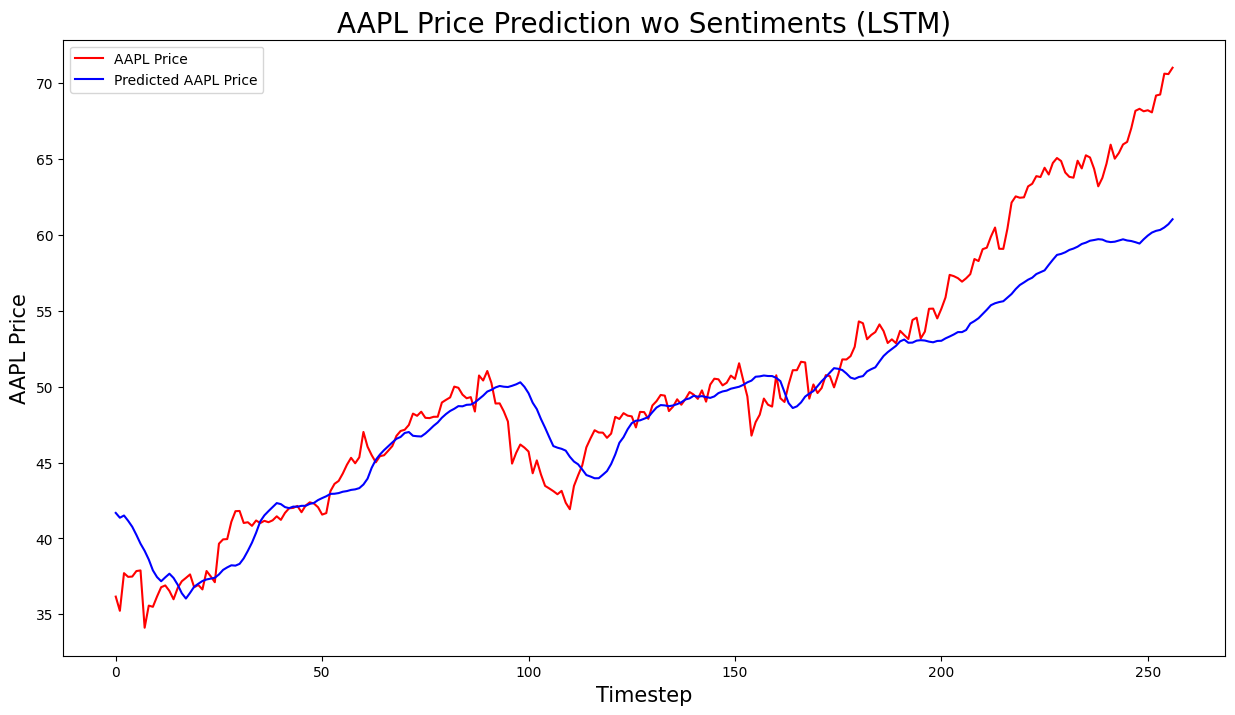

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(rescaled_y_test, color='Red', label='AAPL Price')
plt.plot(rescaled_pred, color='Blue', label='Predicted AAPL Price')
plt.title('AAPL Price Prediction wo Sentiments (LSTM)',fontsize=20)
plt.xlabel('Timestep', fontsize=15)
plt.ylabel('AAPL Price',fontsize=15)
plt.legend()
plt.show()

GRU PART 1 (This part is similar to LSTM)

In [ ]:
final_df["score"] = final_df["score"].fillna(0)
train = final_df.iloc[:1000, [0,6,1]].values
test = final_df.iloc[1000:, [0,6,1]].values
sc = MinMaxScaler(feature_range=(0,1))
train_scaled = sc.fit_transform(train)

In [ ]:
X_train = []
y_train = []
past = 10

for i in range(past, train_scaled.shape[0]):
   X_train.append(train_scaled[i-past:i, [0,1]])
   y_train.append(train_scaled[i, 2])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 2))

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.GRU(20, return_sequences=True, input_shape=(X_train.shape[1], 2)))


model.add(tf.keras.layers.GRU(20, return_sequences=True))


model.add(tf.keras.layers.GRU(20, return_sequences=True))


model.add(tf.keras.layers.GRU(20, return_sequences=True))


model.add(tf.keras.layers.GRU(20))

model.add(tf.keras.layers.Dense(1))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 10, 20)            1440      
                                                                 
 gru_1 (GRU)                 (None, 10, 20)            2520      
                                                                 
 gru_2 (GRU)                 (None, 10, 20)            2520      
                                                                 
 gru_3 (GRU)                 (None, 10, 20)            2520      
                                                                 
 gru_4 (GRU)                 (None, 20)                2520      
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 11541 (45.08 KB)
Trainable params: 11541

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer=optimizer, loss='mean_squared_error')

In [ ]:
history = model.fit(X_train, y_train,
                   epochs=20,
                   batch_size=32)

Epoch 1/20
31/31 [==============================] - 10s 31ms/step - loss: 0.0612
Epoch 2/20
31/31 [==============================] - 1s 37ms/step - loss: 0.0052
Epoch 3/20
31/31 [==============================] - 1s 37ms/step - loss: 0.0013
Epoch 4/20
31/31 [==============================] - 1s 37ms/step - loss: 0.0012
Epoch 5/20
31/31 [==============================] - 1s 35ms/step - loss: 0.0012
Epoch 6/20
31/31 [==============================] - 1s 36ms/step - loss: 0.0012
Epoch 7/20
31/31 [==============================] - 1s 24ms/step - loss: 0.0012
Epoch 8/20
31/31 [==============================] - 1s 25ms/step - loss: 0.0012
Epoch 9/20
31/31 [==============================] - 1s 24ms/step - loss: 0.0012
Epoch 10/20
31/31 [==============================] - 1s 24ms/step - loss: 0.0012
Epoch 11/20
31/31 [==============================] - 1s 24ms/step - loss: 0.0013
Epoch 12/20
31/31 [==============================] - 1s 25ms/step - loss: 0.0011
Epoch 13/20
31/31 [=================

In [ ]:
inputs = final_df[["Open","score", "Close"]][final_df.shape[0] - len(test) - past: ].values
inputs = sc.transform(inputs)

In [ ]:
X_test = []
y_test = []
for i in range(past, len(inputs)):
   X_test.append(inputs[i-past:i, [0,1]])
   y_test.append(inputs[i, 2])
X_test = np.array(X_test)
y_test = np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 2))

In [ ]:
pred = model.predict(X_test)
rescaled_pred = pred * (sc.data_max_[2] - sc.data_min_[2]) + sc.data_min_[2]
rescaled_y_test = y_test * (sc.data_max_[2] - sc.data_min_[2]) + sc.data_min_[2]

9/9 [==============================] - 3s 8ms/step


In [ ]:
mse = mean_squared_error(rescaled_pred, rescaled_y_test)
acc = calc_accuracy(rescaled_pred, rescaled_y_test)
print("MSE of GRU with sentiments: ", mse)
print("Increase/Decrease Accuracy of GRU with sentiments: ", acc)

MSE of GRU with sentiments:  3.9136907885746064
Increase/Decrease Accuracy of GRU with sentiments:  0.5525291828793775


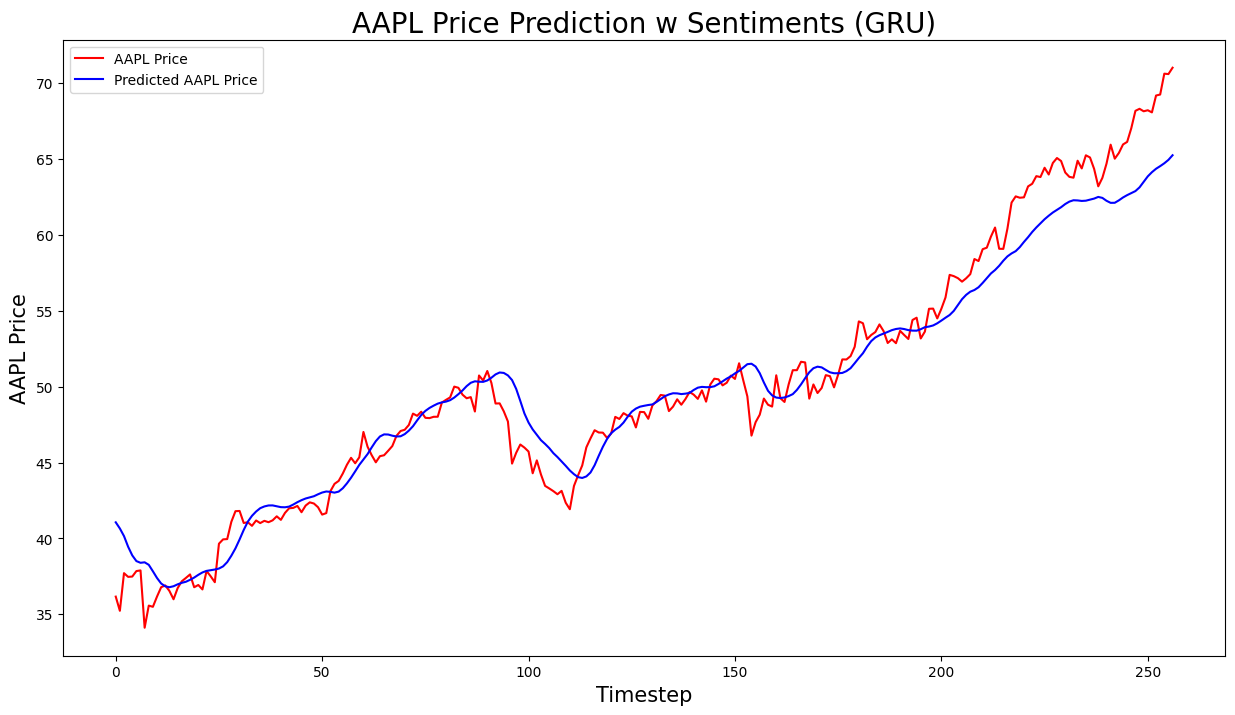

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(rescaled_y_test, color='Red', label='AAPL Price')
plt.plot(rescaled_pred, color='Blue', label='Predicted AAPL Price')
plt.title('AAPL Price Prediction w Sentiments (GRU)',fontsize=20)
plt.xlabel('Timestep', fontsize=15)
plt.ylabel('AAPL Price',fontsize=15)
plt.legend()
plt.show()

GRU PART 2

In [ ]:
train = final_df_wo_sentiments.iloc[:1000, [0,1]].values
test = final_df_wo_sentiments.iloc[1000:, [0,1]].values

sc = MinMaxScaler(feature_range=(0,1))
train_scaled = sc.fit_transform(train)

X_train = []
y_train = []
for i in range(past, train_scaled.shape[0]):
   X_train.append(train_scaled[i-past:i, 0])
   y_train.append(train_scaled[i, 1])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.GRU(20, return_sequences=True, input_shape=(X_train.shape[1], 1)))




model.add(tf.keras.layers.GRU(20, return_sequences=True))




model.add(tf.keras.layers.GRU(20, return_sequences=True))




model.add(tf.keras.layers.GRU(20, return_sequences=True))




model.add(tf.keras.layers.GRU(20))


model.add(tf.keras.layers.Dense(1))

print(model.summary())

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer=optimizer, loss='mean_squared_error')

history = model.fit(X_train, y_train,
                   epochs=20,
                   batch_size=32)

inputs = final_df[["Open", "Close"]][final_df_wo_sentiments.shape[0] - len(test) - past: ].values
inputs = sc.transform(inputs)

X_test = []
y_test = []

for i in range(past, len(inputs)):
   X_test.append(inputs[i-past:i, 0])
   y_test.append(inputs[i, 1])
X_test = np.array(X_test)
y_test = np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

pred = model.predict(X_test)
rescaled_pred = pred * (sc.data_max_[1] - sc.data_min_[1]) + sc.data_min_[1]
rescaled_y_test = y_test * (sc.data_max_[1] - sc.data_min_[1]) + sc.data_min_[1]

mse = mean_squared_error(rescaled_pred, rescaled_y_test)
acc = calc_accuracy(rescaled_pred, rescaled_y_test)
print("MSE of LSTM without sentiments: ", mse)
print("Increase/Decrease Accuracy of LSTM without sentiments: ", acc)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_5 (GRU)                 (None, 10, 20)            1380      
                                                                 
 gru_6 (GRU)                 (None, 10, 20)            2520      
                                                                 
 gru_7 (GRU)                 (None, 10, 20)            2520      
                                                                 
 gru_8 (GRU)                 (None, 10, 20)            2520      
                                                                 
 gru_9 (GRU)                 (None, 20)                2520      
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 11481 (44.85 KB)
Trainable params: 11481

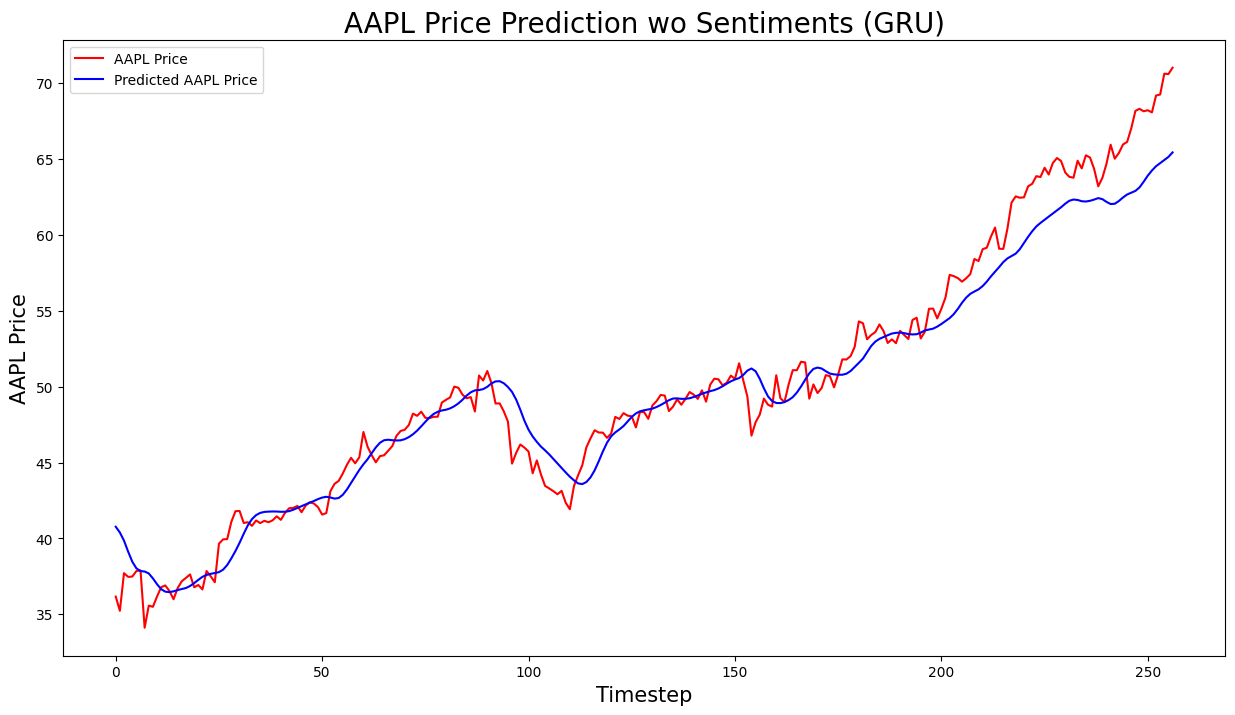

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(rescaled_y_test, color='Red', label='AAPL Price')
plt.plot(rescaled_pred, color='Blue', label='Predicted AAPL Price')
plt.title('AAPL Price Prediction wo Sentiments (GRU)',fontsize=20)
plt.xlabel('Timestep', fontsize=15)
plt.ylabel('AAPL Price',fontsize=15)
plt.legend()
plt.show()

In [ ]:
mse = mean_squared_error(rescaled_pred, rescaled_y_test)
acc = calc_accuracy(rescaled_pred, rescaled_y_test)
print("MSE of LSTM without sentiments: ", mse)
print("Increase/Decrease Accuracy of LSTM without sentiments: ", acc)

MSE of LSTM without sentiments:  3.6993585129525868
Increase/Decrease Accuracy of LSTM without sentiments:  0.5603112840466926


Best parameters: {'C': 10, 'gamma': 0.01}
RMSE: 1.8448318525054113 MAE: 1.1694043603924842
Accuracy: 0.56


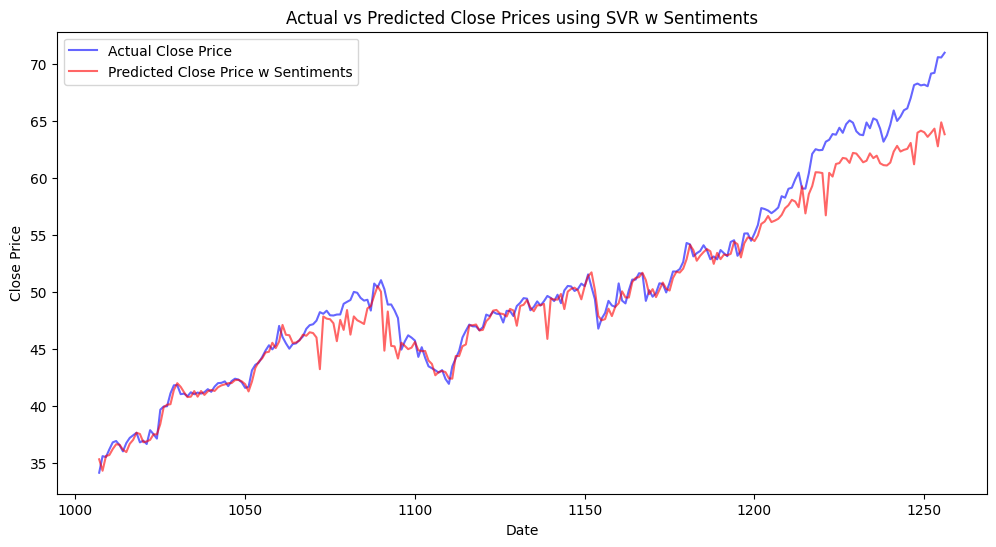

MSE: 3.4034045640185475
RMSE: 1.8448318525054113
Accuracy: 0.56
Best parameters: {'C': 10, 'gamma': 0.01}
RMSE without score feature: 2.4607239800223377
MAE without score feature: 48.478867795650295
Accuracy without score feature: 0.584


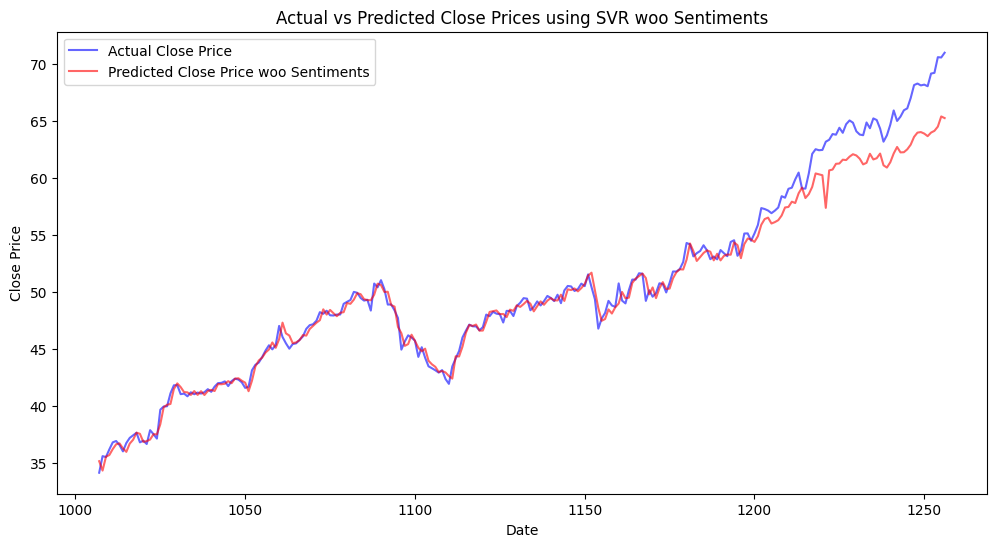

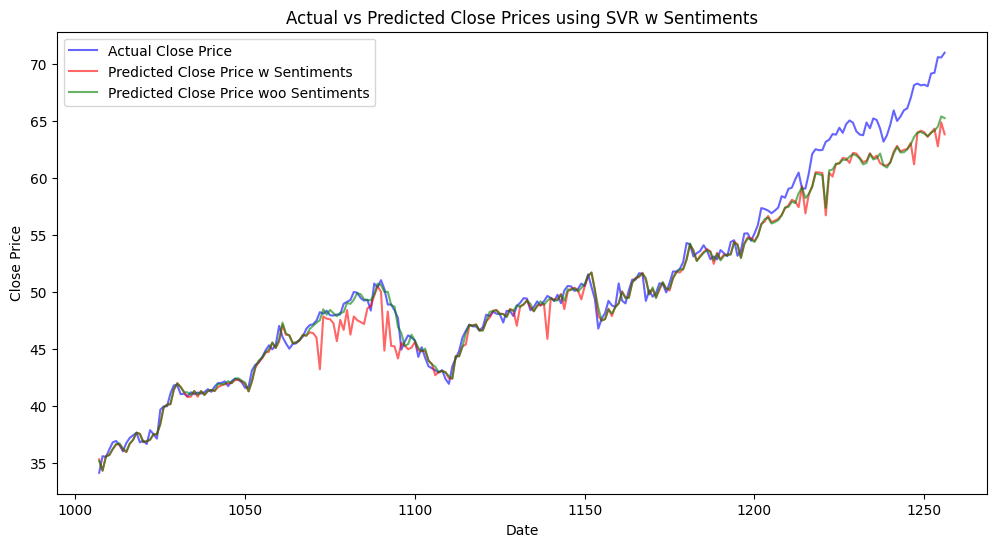

Precision: 0.6223776223776224
Recall: 0.6137931034482759
F-score: 0.6180555555555556
Support: None


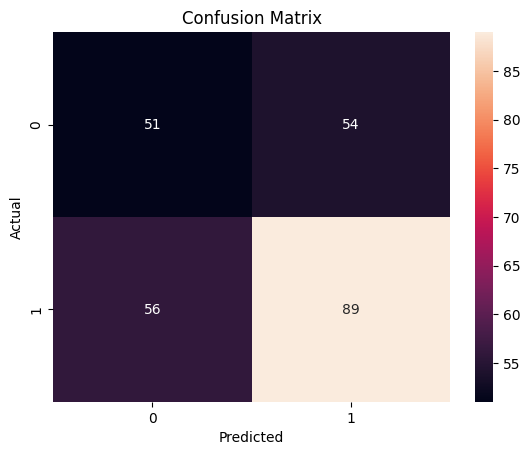

MSE: 2.4607239800223377
RMSE: 1.5686694935589005
Accuracy: 0.584


In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df = final_df.drop("date",axis=1)

# Create lagged features
df['Close_lag1'] = df['Close'].shift(1)

# Drop the NaN values that are generated by shifting
df.dropna(inplace=True)

# Define features and target
X = df.drop(['Close'], axis=1)
y = df['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Standardizing the features
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()

# Initializing and training the SVR model
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train_scaled)

# Parameter tuning with grid search
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10],
              'gamma': [0.01, 0.1, 1]}

grid_search = GridSearchCV(svr_model, param_grid, cv=5)


grid_search.fit(X_train_scaled, y_train_scaled)

print("Best parameters:", grid_search.best_params_)

# Re-train the model with the best parameters
svr_model = grid_search.best_estimator_.fit(X_train_scaled, y_train_scaled)


# Making predictions on the test set
y_pred_scaled = svr_model.predict(X_test_scaled)

# Inverse transform the scaled predictions
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

from sklearn.metrics import mean_squared_error, mean_absolute_error
# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("RMSE:", rmse, "MAE:", mae)
print("Accuracy:", calc_accuracy(y_pred, y_test))
from matplotlib import pyplot as plt
# Visualize the original vs predicted closing prices with rmse value
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Close Price', color='blue', alpha=0.6)
plt.plot(y_test.index, y_pred, label='Predicted Close Price w Sentiments', color='red', alpha=0.6)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Prices using SVR w Sentiments')
plt.legend()
plt.show()

# Return the evaluation metrics
rmse, mae

# Evaluate the model in terms of MSE, RMSE and Accuracy


mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

accuracy = calc_accuracy(y_pred, y_test)

print("MSE:", mse)

print("RMSE:", rmse)

print("Accuracy:", accuracy)

# Train the same model without score feature
X_wo_score = df.drop(['Close', 'score'], axis=1)


# Split the data into training and testing sets

X_train_wo_score, X_test_wo_score, y_train, y_test = train_test_split(X_wo_score, y, test_size=0.2, random_state=42, shuffle=False)

# Standardizing the features

scaler_X = StandardScaler()

X_train_wo_score_scaled = scaler_X.fit_transform(X_train_wo_score)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
X_test_wo_score_scaled = scaler_X.transform(X_test_wo_score)
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()

# Initializing and training the SVR model

svr_model = SVR(kernel='rbf')

svr_model.fit(X_train_wo_score_scaled, y_train_scaled)

# Parameter tuning with grid search
param_grid = {'C': [0.1, 1, 10],
              'gamma': [0.01, 0.1, 1]}

grid_search = GridSearchCV(svr_model, param_grid, cv=5)

best_wo_score_model = grid_search.fit(X_train_wo_score_scaled, y_train_scaled)

print("Best parameters:", grid_search.best_params_)

# Evaluate the best model without score feature after inverse transforming
y_pred_w_score = scaler_y.inverse_transform(best_wo_score_model.predict(X_test_wo_score_scaled).reshape(-1, 1)).flatten()

mse_woo_score = mean_squared_error(y_test, y_pred_w_score)


# Evaluate accuracy
len(df)

print("RMSE without score feature:", mse_woo_score)
print("MAE without score feature:", mean_absolute_error(y_test, best_wo_score_model.predict(X_test_wo_score_scaled)))
print("Accuracy without score feature:", calc_accuracy(y_pred_w_score, y_test))
#Plot the actual vs predicted prices

# Scale the pred back into original scale

y_pred_wo_score_scaled = best_wo_score_model.predict(X_test_wo_score_scaled)


y_pred_wo_score = scaler_y.inverse_transform(y_pred_wo_score_scaled.reshape(-1, 1)).flatten()

plt.figure(figsize=(12, 6))

plt.plot(y_test.index, y_test, label='Actual Close Price', color='blue', alpha=0.6)

plt.plot(y_test.index, y_pred_wo_score, label='Predicted Close Price woo Sentiments', color='red', alpha=0.6)

plt.xlabel('Date')

plt.ylabel('Close Price')

plt.title('Actual vs Predicted Close Prices using SVR woo Sentiments')

plt.legend()

plt.show()

#Visualize both w and wo sentiments with the original data
plt.figure(figsize=(12, 6))

plt.plot(y_test.index, y_test, label='Actual Close Price', color='blue', alpha=0.6)

plt.plot(y_test.index, y_pred, label='Predicted Close Price w Sentiments', color='red', alpha=0.6)

plt.plot(y_test.index, y_pred_wo_score, label='Predicted Close Price woo Sentiments', color='green', alpha=0.6)

plt.xlabel('Date')

plt.ylabel('Close Price')

plt.title('Actual vs Predicted Close Prices using SVR w Sentiments')

plt.legend()

plt.show()

#Lets create a precision recall table with y_comparison and pred_comparison
pred_comparison,y_comparison =calc_accuracy2(y_pred, y_test)


from sklearn.metrics import precision_recall_fscore_support

precision, recall, fscore, support = precision_recall_fscore_support(y_comparison, pred_comparison, average='binary')

print("Precision:", precision)

print("Recall:", recall)

print("F-score:", fscore)

print("Support:", support)

#Plot confusion matrix

from sklearn.metrics import confusion_matrix

confusion_matrix(y_comparison, pred_comparison)

#Plot with seaborn label 0 as down label 1 as up
import seaborn as sns

sns.heatmap(confusion_matrix(y_comparison, pred_comparison), annot=True, fmt='d')

plt.xlabel('Predicted')

plt.ylabel('Actual')

plt.title('Confusion Matrix')

plt.show()

#Evaluate the model in terms of MSE, RMSE and Accuracy

mse = mean_squared_error(y_test, y_pred_wo_score)

rmse = np.sqrt(mse)

accuracy = calc_accuracy(y_pred_wo_score, y_test)

print("MSE:", mse)

print("RMSE:", rmse)

print("Accuracy:", accuracy)